# Project 2: Analyzing Housing Prices 

I am going to import a dataset from Kaggle with Californian house prices from the year 1990.

I will first clean the dataset so I can analyze and visualize the data later. First and foremost we will import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next we will import the dataset and pull it into a dataframe.

In [2]:

df = pd.read_csv(r"C:\Users\mvdp1\OneDrive\Documenten\GitHub\seaborn-data 3\housing.csv")

### Data cleaning

Time to take a look at our newly created dataframe.

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The data is pretty much free of NaN values except in the total_bedrooms column. All columns are stored as float except the last column which is stored as string.

Lets remove the NaN values.

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape[0]

20433

When applying the shape function we can see that the rows with NaN values have been removed.

Next we will give our index a name: "House_ID"

In [7]:
df = df.rename_axis('House_ID')

Then I will remove the 2 columns that I wont be analyzing later. those are "longitude" and "latitude".

In [8]:
df.drop(columns= ['longitude', 'latitude'], inplace=True)

Next we'll split the majority of column in 5 quantiles. <br> 
We'll use the pandas qcut function to get this done. This will also automatically change the datatype from float to category. <br> The big advantage of categorizing the values is that we can more easily group on them. 

In [9]:

columns_to_exclude = ['median_house_value', 'ocean_proximity']


for col in df.columns:
    if col not in columns_to_exclude:
       df[col] = pd.qcut(df[col], q=5, labels=[0, 0.25, 0.50, 0.75, 1])



In [10]:
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
House_ID,,,,,,,,
0,1.00,0.00,0.00,0.00,0.00,1.00,452600.0,NEAR BAY
1,0.25,1.00,1.00,1.00,1.00,1.00,358500.0,NEAR BAY
2,1.00,0.25,0.00,0.00,0.00,1.00,352100.0,NEAR BAY
3,1.00,0.00,0.00,0.00,0.00,1.00,341300.0,NEAR BAY
4,1.00,0.25,0.25,0.00,0.25,0.50,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,0.25,0.25,0.25,0.25,0.25,0.00,78100.0,INLAND
20636,0.25,0.00,0.00,0.00,0.00,0.25,77100.0,INLAND
20637,0.00,0.50,0.50,0.25,0.50,0.00,92300.0,INLAND


Using the dtypes function we can see that the column are indeed casted to category.

In [11]:
df.dtypes.to_frame()

,0
housing_median_age,category
total_rooms,category
total_bedrooms,category
population,category
households,category
median_income,category
median_house_value,float64
ocean_proximity,object


Although I actually do prefer my columns to be stored as float so I can aggregate on them too. So lets cast them back to float.

In [12]:
columns_to_cast = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

df[columns_to_cast] = df[columns_to_cast].astype(float)


In [13]:
df.dtypes.to_frame()

,0
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


Ok that seems fine, Now I will create an additional column "MHV_category". <br> Thats an abbreviation for median house value category, which I will use to categorize median house values. Now we will be able to group on median house value aswell.

In [14]:
df['MHV_category'] = pd.qcut(df['median_house_value'], q=5, labels=[0, 0.25, 0.5, 0.75, 1])

In [15]:
df.MHV_category.value_counts(normalize= True).to_frame().sort_index(ascending=False)

,proportion
MHV_category,
1.00,0.199971
0.75,0.199677
0.50,0.200117
0.25,0.199922
0.00,0.200313


using the value_counts function, we kan see taht the new column is devided in 5 equal parts of each 20%.

Finally, we will adjust the column order.

In [16]:
columns = df.columns.tolist()


columns[7], columns[6] = columns[6], columns[7]


df = df[columns]


Now the data is cleaned and ready to be analyzed.

### The Analysis

We will start by taking a quick look at the most expensive and cheapest blocks of houses.

In [17]:
df.sort_values(by='median_house_value', ascending=False)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,MHV_category
House_ID,,,,,,,,,
8852,1.00,0.50,0.00,0.25,0.00,1.00,<1H OCEAN,500001.0,1.0
10454,0.25,0.00,0.00,0.00,0.00,0.25,<1H OCEAN,500001.0,1.0
5487,0.50,0.75,1.00,0.50,1.00,1.00,<1H OCEAN,500001.0,1.0
16020,1.00,0.25,0.00,0.00,0.00,1.00,NEAR OCEAN,500001.0,1.0
16019,1.00,0.50,0.25,0.25,0.25,1.00,NEAR OCEAN,500001.0,1.0
...,...,...,...,...,...,...,...,...,...
5887,0.75,0.00,0.00,0.00,0.00,0.25,<1H OCEAN,17500.0,0.0
9188,1.00,0.00,0.00,0.00,0.00,0.75,INLAND,14999.0,0.0
2799,0.25,0.00,0.00,0.00,0.00,0.00,INLAND,14999.0,0.0


Here we can see the 5 most expensive and the 5 cheapest house blocks. The biggest difference seems to be in terms of total rooms.

To see it more clearly I will group on the 'MHV_category' column and aggregate on the rest of the numerical column (apart from the median price off course).<br> Then I'll make plots in matplotlib to visualize the results.

C:\Users\mvdp1\AppData\Local\Temp\ipykernel_15980\3160608220.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['MHV_category']).agg({


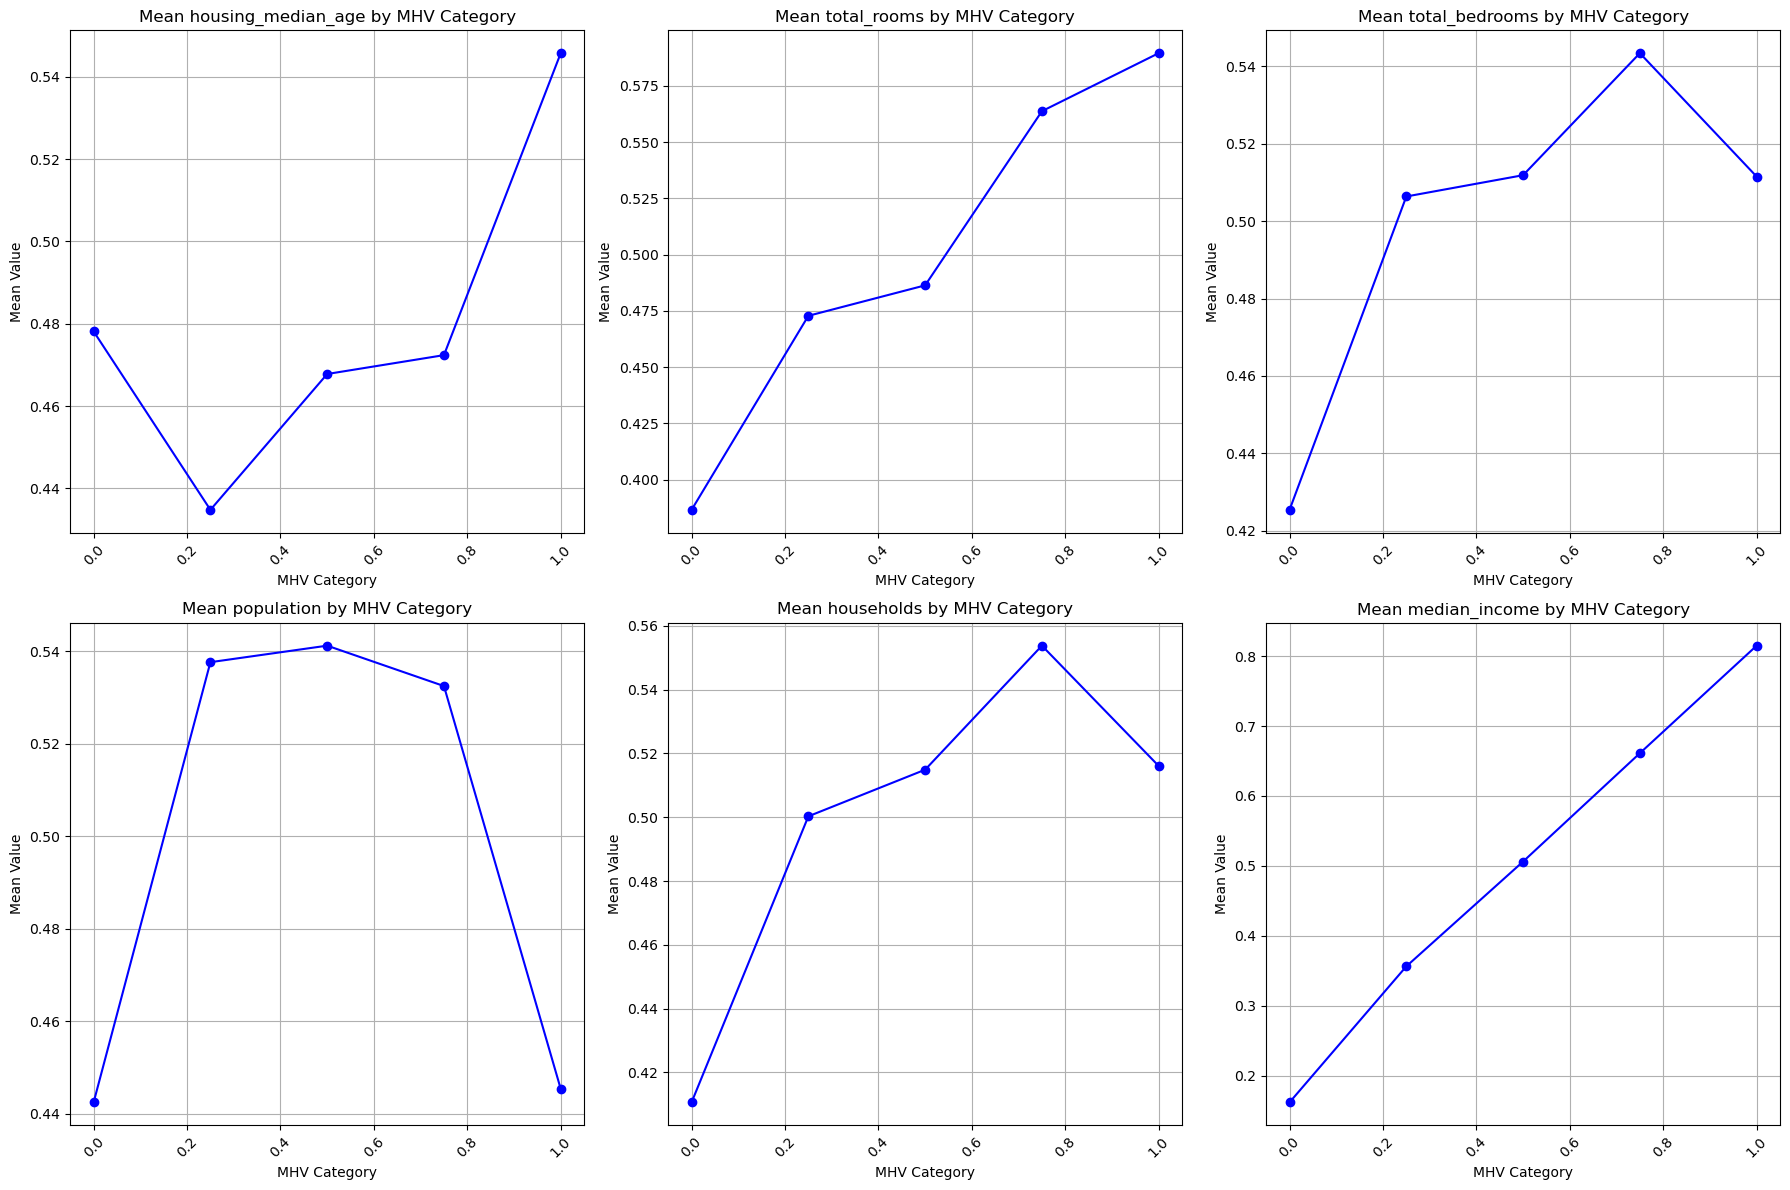

In [18]:
grouped_data = df.groupby(['MHV_category']).agg({
    'housing_median_age': 'mean',  
    'total_rooms': 'mean',  					
    'total_bedrooms': 'mean',     
    'population': 'mean',
    'households': 'mean',
    'median_income': 'mean'
}, observed=True).sort_values(by='MHV_category', ascending=False)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


axes = axes.flatten()


for i, (column, ax) in enumerate(zip(grouped_data.columns, axes)):
    ax.plot(grouped_data.index, grouped_data[column], color='blue', marker='o')
    ax.set_xlabel('MHV Category')
    ax.set_ylabel('Mean Value')
    ax.set_title(f'Mean {column} by MHV Category')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)


for j in range(len(grouped_data.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



It looks like the most factors in this dataset are positively correlated with the house median price.

To be sure, we will now group on the columns individualy en then visualize the results.


#### Factor 1: Housing Median Age

In [19]:
group_by_median_age= df.groupby(['housing_median_age'], observed=False)['median_house_value'].mean()
group_by_median_age.to_frame().sort_index(ascending=False)

,median_house_value
housing_median_age,
1.00,228942.058073
0.75,207879.344766
0.50,204740.562165
0.25,202942.540885
0.00,193078.432025


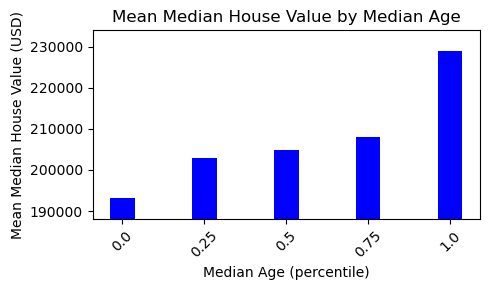

In [20]:

plt.figure(figsize=(5, 3)) 

bar_positions = np.arange(len(group_by_median_age.index))

plt.bar(bar_positions, group_by_median_age.values, color='blue', width=0.3)

plt.xlabel('Median Age (percentile)')
plt.ylabel('Mean Median House Value (USD)')
plt.title('Mean Median House Value by Median Age')


plt.xticks(bar_positions, group_by_median_age.index, rotation=45)

plt.tight_layout()  

plt.ylim(group_by_median_age.min()-5000, group_by_median_age.max()+5000)

plt.show()


There seems to be a clear positive correlation between the median house age and median house value. I can't say thats in line with my expectations and logic in general. However I will assume these older houses are bigger in size. Castles for example are bot very old and expensive. 

#### Factor 2: Total Rooms

In [21]:
group_by_total_rooms= df.groupby(['total_rooms'], observed=False)['median_house_value'].mean()
group_by_total_rooms.to_frame().sort_index(ascending=False)

,median_house_value
total_rooms,
1.00,235813.042861
0.75,223739.878610
0.50,206273.567230
0.25,193149.170374
0.00,175414.798289


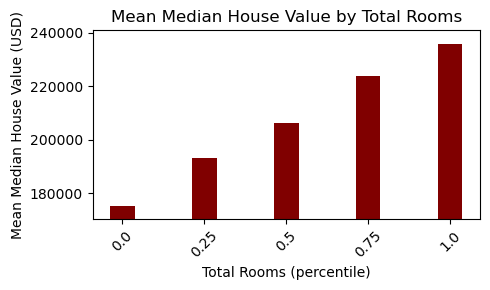

In [22]:

plt.figure(figsize=(5, 3)) 

bar_positions = np.arange(len(group_by_total_rooms.index))

plt.bar(bar_positions, group_by_total_rooms.values, color='#800000', width=0.3)

plt.xlabel('Total Rooms (percentile)')
plt.ylabel('Mean Median House Value (USD)')
plt.title('Mean Median House Value by Total Rooms')


plt.xticks(bar_positions, group_by_total_rooms.index, rotation=45)

plt.tight_layout()  

plt.ylim(group_by_total_rooms.min()-5000, group_by_total_rooms.max()+5000)

plt.show()


Although very obvious, the house value is clearly positively correlated with the number of rooms


#### Factor 3: Population

In [23]:
group_by_population= df.groupby(['population'], observed=False)['median_house_value'].mean()


In [24]:
group_by_population.to_frame().sort_index(ascending=False)

,median_house_value
population,
1.00,201334.606951
0.75,201304.536221
0.50,205848.043169
0.25,213604.847093
0.00,212209.364059


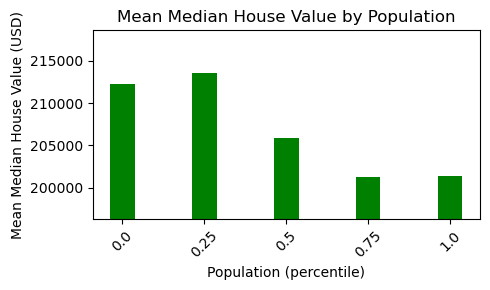

In [25]:
plt.figure(figsize=(5, 3)) 

bar_positions = np.arange(len(group_by_population.index))

plt.bar(bar_positions, group_by_population.values, color='green', width=0.3)

plt.xlabel('Population (percentile)')
plt.ylabel('Mean Median House Value (USD)')
plt.title('Mean Median House Value by Population')


plt.xticks(bar_positions, group_by_population.index, rotation=45)

plt.tight_layout()  

plt.ylim(group_by_population.min()-5000, group_by_population.max()+5000)

plt.show()

This chart shows that the house valuations are higher on average in more densely populated areas. That doesn't suprise me one bit because bigger cities are generally more expensive to live because the demand is higher due to the larger job market and services that are available.

#### Factor 4: Households

In [26]:
group_by_households= df.groupby(['households'], observed=False)['median_house_value'].mean()

group_by_households.to_frame().sort_index(ascending=False)

,median_house_value
households,
1.00,220675.080344
0.75,209807.477073
0.50,207911.249506
0.25,201265.878559
0.00,194793.867138


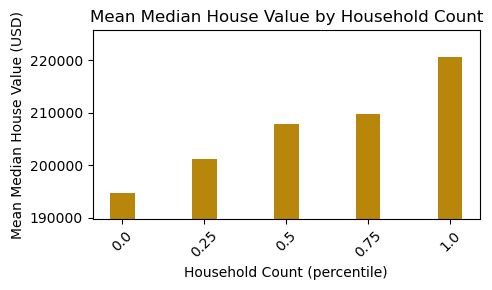

In [27]:
plt.figure(figsize=(5, 3)) 

bar_positions = np.arange(len(group_by_households.index))

plt.bar(bar_positions, group_by_households.values, color='darkgoldenrod', width=0.3)

plt.xlabel('Household Count (percentile)')
plt.ylabel('Mean Median House Value (USD)')
plt.title('Mean Median House Value by Household Count')

plt.xticks(bar_positions, group_by_households.index, rotation=45)


plt.ylim(group_by_households.min()-5000, group_by_households.max()+5000)

plt.tight_layout()  

plt.show()


According to the dataset a bigger amount of households is associated with higher house valuations. 

#### Factor 5: Mediaan inkomen

In [28]:
group_by_median_income= df.groupby(['median_income'], observed=False)['median_house_value'].mean()
group_by_median_income.to_frame().sort_index(ascending=False)

,median_house_value
median_income,
1.00,335162.841693
0.75,229711.295126
0.50,194165.906846
0.25,156968.410671
0.00,118333.084659


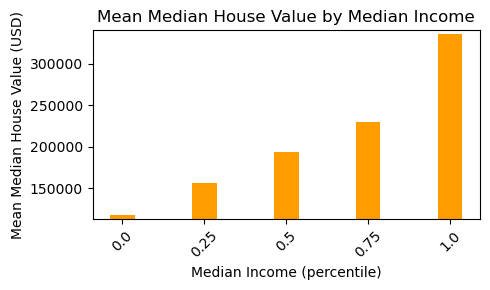

In [29]:
plt.figure(figsize=(5, 3)) 

bar_positions = np.arange(len(group_by_median_income.index))

plt.bar(bar_positions, group_by_median_income.values, color='#FF9C00', width=0.3)

plt.xlabel('Median Income (percentile)')
plt.ylabel('Mean Median House Value (USD)')
plt.title('Mean Median House Value by Median Income')

plt.xticks(bar_positions, group_by_median_income.index, rotation=45)


plt.ylim(group_by_median_income.min()-5000, group_by_median_income.max()+5000)

plt.tight_layout()  

plt.show()

Although it should come as no suprise, the graph clearly shows a significant price difference between the poor and rich neighborhoods.
Froma all factors till now this is the one with the biggest impact by far. These house valuations in the richest areas are 3 fold higher then those in the poorest areas.


#### Factor 6: ocean_proximity	

In [30]:
group_by_ocean_proximity= df.groupby(['ocean_proximity'], observed=False)['median_house_value'].mean()
group_by_ocean_proximity.to_frame().sort_values(by= 'median_house_value', ascending=True)

,median_house_value
ocean_proximity,
INLAND,124896.863147
<1H OCEAN,240267.990812
NEAR OCEAN,249042.355023
NEAR BAY,259279.292070
ISLAND,380440.000000


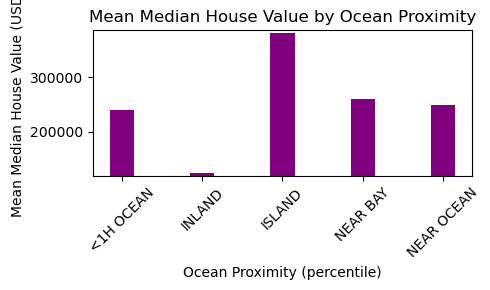

In [31]:
plt.figure(figsize=(5, 3)) 

bar_positions = np.arange(len(group_by_ocean_proximity.index))

plt.bar(bar_positions,group_by_ocean_proximity.values, color='#800080', width=0.3)

plt.xlabel('Ocean Proximity (percentile)')
plt.ylabel('Mean Median House Value (USD)')
plt.title('Mean Median House Value by Ocean Proximity')

plt.xticks(bar_positions, group_by_ocean_proximity.index, rotation=45)


plt.ylim(group_by_ocean_proximity.min()-5000, group_by_ocean_proximity.max()+5000)

plt.tight_layout()  

plt.show()

The chart shows that the house valuations are much lower inland then near the ocean . <br> Areas located on islands are the most expensive with an average valuation of almost 400.000 USD. 

#### Export

To finish this off I'm going to export the dataframe to a csv file, so I can load it in powerbi to make better visualisations.

In [32]:
df.to_csv('California_housing_prices.csv',index=True)

### Conclusion

To recap:

According to this dataset, housing age, number of rooms, number of bedrooms, population density, number of households, median income, and proximity to the ocean are all positively correlated with higher house prices.

